In [ ]:
!pip install dataprep

In [ ]:
import pandas as pd
import json
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from dataprep.eda import create_report

In [57]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
df=pd.read_csv("/content/drive/MyDrive/Cricket Related Data/Condensed.csv")

In [59]:
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [60]:
players=pd.read_csv("/content/drive/MyDrive/Cricket Related Data/Players.csv")
players.drop(players.columns[players.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
left_bat_players=list(players.query('Batting == "Left Handed Bat"')["Name"])
right_bat_players=list(players.query('Batting == "Right Handed Bat"')["Name"])

In [61]:
left_bat=df.query('Name in @left_bat_players')
right_bat=df.query('Name in @right_bat_players')

In [62]:
def expand(expr):
    expr=expr[1:-1]
    a,b,c=list(map(int, expr.split(", ")))
    return a,b,c

In [68]:
dataf={
    "Name":[],
    "R Fast SR":[],
    "R Medium SR":[],
    "R off SR":[],
    "R leg SR":[],
    "L Fast SR":[],
    "L off SR":[],
    "L leg SR":[],
    "R Fast Wk Avg":[],
    "R Medium Wk Avg":[],
    "R off Wk Avg":[],
    "R leg Wk Avg":[],
    "L Fast Wk Avg":[],
    "L off Wk Avg":[],
    "L leg Wk Avg":[]
}
buckets=["R Fast SR",
    "R Medium SR",
    "R off SR",
    "R leg SR",
    "L Fast SR",
    "L off SR",
    "L leg SR",
    "R Fast Wk Avg",
    "R Medium Wk Avg",
    "R off Wk Avg",
    "R leg Wk Avg",
    "L Fast Wk Avg",
    "L off Wk Avg",
    "L leg Wk Avg"]
c=0
dataf["Name"]=list(left_bat["Name"])+list(right_bat["Name"])

In [ ]:
dataf

In [70]:
colour=ListedColormap(['r','b','g','c','y','m','k'])
heads=list(df.columns)[1:-2]
heads.remove("Left arm Medium")
#print(heads)
for i in heads:
    left_score=list(left_bat[i])
    left_sr=[]
    left_wk_avg=[]
    right_score=list(right_bat[i])
    right_sr=[]
    right_wk_avg=[]
    for j in left_score:
        try:
            #print(j)
            runs,balls,wks=expand(j)
            left_sr.append(runs/balls)
            left_wk_avg.append(balls/wks)
        except:
            if wks==0 and balls!=0:
                left_wk_avg.append(0)
            else:
                left_sr.append(0)
                left_wk_avg.append(0)
    #print(left_sr)
    for j in right_score:
        try:
            runs,balls,wks=expand(j)
            right_sr.append(runs/balls)
            right_wk_avg.append(balls/wks)
        except:
            if wks==0 and balls!=0:
                right_wk_avg.append(0)
            else:
                right_sr.append(0)
                right_wk_avg.append(0)
    dataf[buckets[c]]=left_sr+right_sr
    dataf[buckets[c+7]]=left_wk_avg+right_wk_avg
    c=c+1
    scatter=plt.scatter(left_sr, left_wk_avg, color='red')
    scatter=plt.scatter(right_sr, right_wk_avg, color='blue')
    plt.legend(handles=scatter.legend_elements()[0])
    plt.title(i)
    plt.figure(figsize=(150,150))
    # plt.set_xlim((0.0, 1.5))
    # plt.set_ylim((0, 100))
    plt.show()

IndexError: ignored

In [26]:
final_df=pd.DataFrame(dataf)

In [55]:
report = create_report(final_df)
report

Output hidden; open in https://colab.research.google.com to view.

In [27]:
df_2=final_df[(final_df["R Fast SR"]!=0)]# & (final_df["R Medium SR"]!=0) & (final_df["R off SR"]!=0) & (final_df["R leg SR"]!=0) & (final_df["L Fast SR"]!=0) & (final_df["L off SR"]!=0) & (final_df["L leg SR"]!=0)]

In [ ]:
df_2
df2=df_2.copy()
df2

,Name,R Fast SR,R Medium SR,R off SR,R leg SR,L Fast SR,L off SR,L leg SR,R Fast Wk Avg,R Medium Wk Avg,R off Wk Avg,R leg Wk Avg,L Fast Wk Avg,L off Wk Avg,L leg Wk Avg
1,A Vala,0.670886,0.352941,0.597561,0.618605,0.600000,0.678899,0.000,0.012658,0.000000,0.024390,0.018605,0.026667,0.041284,0.0
3,Aamir Kaleem,1.000000,0.000000,0.000000,0.000000,0.000000,1.250000,0.000,0.250000,0.000000,0.000000,0.000000,0.000000,0.125000,0.0
4,AC Gilchrist,1.124073,0.838509,0.867978,0.963333,0.736842,1.369427,0.500,0.022927,0.018634,0.028090,0.016667,0.052632,0.006369,0.0
6,Adnan Mufti,0.781457,0.880000,0.000000,0.854545,0.545455,0.779221,0.000,0.026490,0.000000,0.000000,0.036364,0.000000,0.025974,0.0
9,Afif Hossain,1.063158,1.428571,1.177419,0.746032,0.642857,0.774194,0.475,0.021053,0.023810,0.000000,0.023810,0.000000,0.032258,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
768,YK Pathan,1.120690,1.000000,0.918367,0.686567,1.222222,1.388889,0.000,0.051724,0.045455,0.061224,0.029851,0.000000,0.027778,0.0
769,Younis Khan,0.638245,0.818533,0.668550,0.881148,0.795455,0.735363,0.000,0.033514,0.011583,0.026365,0.014344,0.000000,0.023419,0.0
770,Z Crawley,1.195122,0.000000,1.000000,0.000000,0.000000,1.000000,0.000,0.024390,0.000000,0.047619,0.000000,0.000000,0.000000,0.0
771,Zubayr Hamza,0.687500,0.266667,0.000000,0.000000,0.000000,0.000000,0.000,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [ ]:
for column in list(df2.columns)[1:-2]:
    df2[column] = (df2[column] - df2[column].mean()) / df2[column].std()    

In [ ]:
left_bat=df2.query('Name in @left_bat_players')
right_bat=df2.query('Name in @right_bat_players')

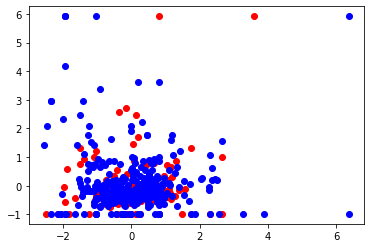

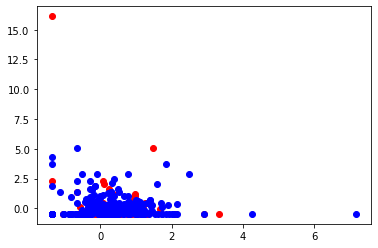

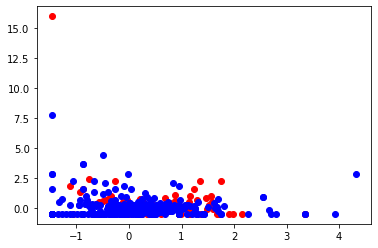

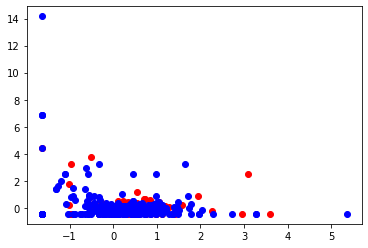

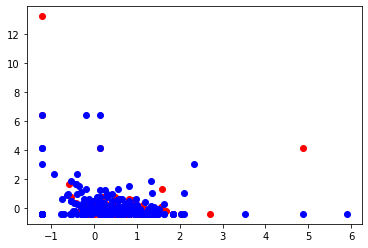

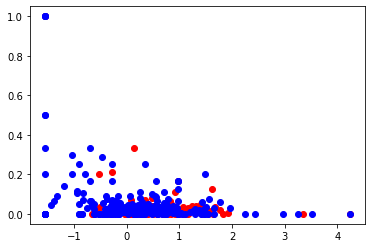

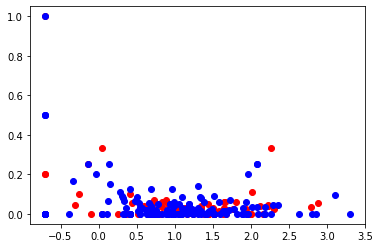

In [ ]:
for i in range(int(len(buckets)/2)):
    plt.scatter(list(left_bat[buckets[i]]),list(left_bat[buckets[i+7]]),color="red")
    plt.scatter(list(right_bat[buckets[i]]),list(right_bat[buckets[i+7]]),color="blue")
    plt.show()

                      PC0       PC1       PC2       PC3       PC4       PC5  \
R Fast SR       -0.194234 -0.389448 -0.297669  0.047334  0.017996  0.684140   
R Medium SR     -0.399094 -0.072247  0.014297  0.037441  0.160639 -0.113172   
R off SR        -0.364971 -0.202175  0.120971  0.013766  0.186431  0.035450   
R leg SR        -0.420303  0.099027 -0.109318 -0.069294 -0.004442 -0.077592   
L Fast SR       -0.373485  0.181886 -0.032360 -0.105234 -0.079742  0.134483   
L off SR        -0.428733 -0.059852  0.102495  0.073325 -0.037450 -0.018615   
L leg SR        -0.327157 -0.088153 -0.022900 -0.097051 -0.298218 -0.126392   
R Fast Wk Avg    0.221817 -0.213779 -0.217947 -0.459547  0.102998  0.364200   
R Medium Wk Avg -0.083271  0.381178 -0.433116 -0.200543  0.704863 -0.126390   
R off Wk Avg    -0.027760  0.482947  0.559688  0.180388  0.209637  0.544771   
R leg Wk Avg     0.071612 -0.227016 -0.225762  0.794363  0.266744 -0.033400   
L Fast Wk Avg   -0.027598  0.521733 -0.522639  0.224

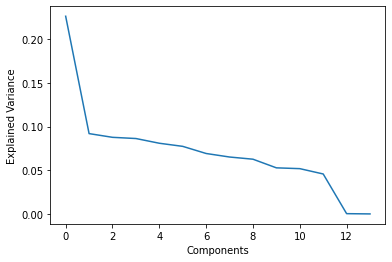

In [ ]:
import pandas
from sklearn.decomposition import PCA
import numpy

df3=df2.copy()
df3=df3.drop('Name', axis='columns')

#print(df3)

pca = PCA(n_components=df3.shape[1])
pca.fit(df3)

# Reformat and view results
loadings = pandas.DataFrame(pca.components_.T,
columns=['PC%s' % _ for _ in range(len(df3.columns))],
index=df3.columns)
print(loadings)

plt.plot(pca.explained_variance_ratio_)
plt.ylabel('Explained Variance')
plt.xlabel('Components')
plt.show()

In [ ]:
print(pd.DataFrame(pca.components_,columns=df3.columns,index = ['PC-1','PC-2']))

ValueError: Shape of passed values is (14, 14), indices imply (2, 14)